# A proto-API for accessing AICS cell images

The [Allen Institute for Cell Science][] has, as a primary goal, understanding the natural and induced variation in human stem cells as they progress through the cell cycle and differentiate into different cell types. This means we end up with many many images of fluorescently labeled cells. They are all browsable at the [Allen Cell Explorer][] but if you are doing any sort of programatic exploration of cell space, you'd probably like to be able to download and visualize individual cells. That's what this post is for.

Necessary prerequisites are the installation of the standard python data science pack. 


[Allen Institute for Cell Science]: https://www.alleninstitute.org/what-we-do/cell-science/
[Allen Cell Explorer]: http://www.allencell.org/

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

To decide what cells are interesting we'll use a [precomputed set of features](http://www.allencell.org/feature-analysis-data-downloads.html) which can be [directly downloaded](http://www.allencell.org/uploads/8/1/9/9/81996008/aics_cell-feature-analysis_v1.7.csv.zip).

In [17]:
%%bash
wget http://www.allencell.org/uploads/8/1/9/9/81996008/aics_cell-feature-analysis_v1.7.csv.zip
unzip aics_cell-feature-analysis_v1.7.csv.zip
recode ISO-8859-1..UTF-8 AICS_Cell-feature-analysis_v1.7.csv

Archive:  aics_cell-feature-analysis_v1.7.csv.zip
  inflating: AICS_Cell-feature-analysis_v1.7.csv  
   creating: __MACOSX/
  inflating: __MACOSX/._AICS_Cell-feature-analysis_v1.7.csv  


--2017-09-25 16:03:08--  http://www.allencell.org/uploads/8/1/9/9/81996008/aics_cell-feature-analysis_v1.7.csv.zip
Resolving www.allencell.org... 199.34.228.76
Connecting to www.allencell.org|199.34.228.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 223493 (218K) [application/zip]
Saving to: ‘aics_cell-feature-analysis_v1.7.csv.zip’

     0K .......... .......... .......... .......... .......... 22% 1.23M 0s
    50K .......... .......... .......... .......... .......... 45% 2.39M 0s
   100K .......... .......... .......... .......... .......... 68% 24.9M 0s
   150K .......... .......... .......... .......... .......... 91% 2.72M 0s
   200K .......... ........                                   100% 30.9M=0.08s

2017-09-25 16:03:08 (2.64 MB/s) - ‘aics_cell-feature-analysis_v1.7.csv.zip’ saved [223493/223493]



We'll load this into a dataframe and take a first look at the data. Particularly, we're look into the relationship between cell and nuclear volume. Naively we expect them to scale together. 

In [160]:
df = pd.read_csv('AICS_Cell-feature-analysis_v1.7.csv')
df.head(2)

,classes,Cell ID,Nuclear volume (fL),Cellular volume (fL),Nuclear surface area (µm2),Cellular surface area (µm2),Radial proximity (unitless),Apical proximity (unitless)
0,Tom20,AICS-11_0_2,831.598877,2112.703306,459.631957,1103.737609,0.845234,0.964551
1,Tom20,AICS-11_0_3,609.158932,1502.489995,393.854416,997.289951,0.875323,-0.968619


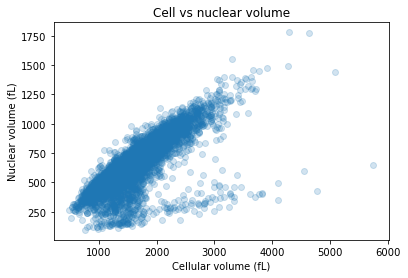

In [165]:
xlabel, ylabel = 'Cellular volume (fL)', 'Nuclear volume (fL)'
plt.scatter(df[xlabel], df[ylabel], alpha=0.2)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("Cell vs nuclear volume")
plt.show()

There is obviously a central sequence here, but just as obviously some process that is falling below is where we can have an increased cell volume without a commensurately increased nuclear volume. The simplest model we can use to fit that is a straight line fit. 

In [166]:
import statsmodels.api as sm
X, y = df[xlabel], df[ylabel]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
outlier_inds = model.resid<model.resid.quantile(0.001)
outliers = df[outlier_inds]

In [195]:
a[0][1]

0.312904524249011

In [196]:
ci = model.conf_int(.999)

# PLOT CI AND OUTLIERS WITH FILL BETWEEN

In [191]:
a

,0,1
const,136.407987,136.422436
Cellular volume (fL),0.312905,0.312913


ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)

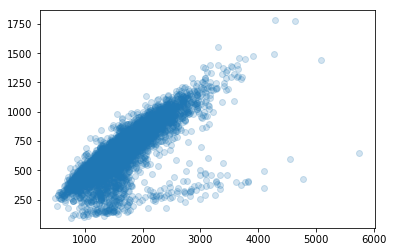

In [176]:
xlabel, ylabel = 'Cellular volume (fL)', 'Nuclear volume (fL)'
plt.scatter(df[xlabel], df[ylabel], alpha=0.2)
minmax = np.array((df[xlabel].min(), df[xlabel].max()))
plt.plot(minmax, model.predict(minmax))
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("Cell vs nuclear volume")
plt.show()

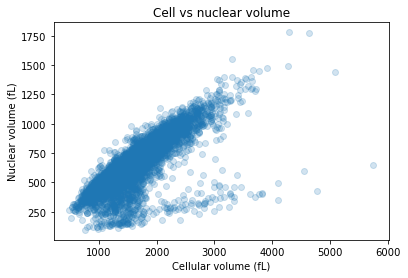

In [165]:
xlabel, ylabel = 'Cellular volume (fL)', 'Nuclear volume (fL)'
plt.scatter(df[xlabel], df[ylabel], alpha=0.2)
plt.plot()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("Cell vs nuclear volume")
plt.show()

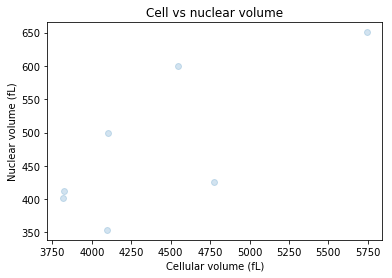

In [159]:
fig, ax = plt.subplots()
xlabel, ylabel = 'Cellular volume (fL)', 'Nuclear volume (fL)'
ax.scatter(outliers[xlabel], outliers[ylabel], alpha=0.2)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title("Cell vs nuclear volume")
plt.show()

# LEFT OFF HERE Ok, time to actually download and display

In [150]:
outliers

,classes,Cell ID,Nuclear volume (fL),Cellular volume (fL),Nuclear surface area (µm2),Cellular surface area (µm2),Radial proximity (unitless),Apical proximity (unitless)
758,Sec61-beta,AICS-10_14_9,778.811905,1090.499926,527.994638,654.295672,0.204659,-0.174411
1111,Alpha-actinin,AICS-7_59_1,979.143904,1560.412813,538.341912,935.744517,0.505916,-0.895862
2242,Alpha-tubulin,AICS-12_78_10,1134.307670,2065.392302,569.078675,1078.267283,0.690255,-0.058994
2515,Lamin B1,AICS-13_64_6,946.152047,1647.926265,561.503712,1075.366796,-0.618989,0.230674
3727,Tight junction ZO1,AICS-23_12_2,1780.607951,4284.859980,843.597634,2215.049237,1.000000,0.056311
4331,Fibrillarin,AICS-14_196_8,849.013136,1280.628258,479.285459,743.737849,-1.000000,-0.460443
4650,Desmoplakin,AICS-17_74_1,1551.841732,3300.750290,728.843539,1798.023679,1.000000,0.029764


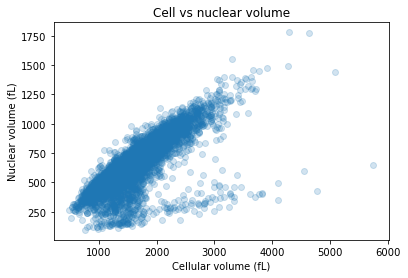

In [127]:
fig, ax = plt.subplots()
xlabel, ylabel = 'Cellular volume (fL)', 'Nuclear volume (fL)'
ax.scatter(df[xlabel], df[ylabel], alpha=0.2)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title("Cell vs nuclear volume")
ax.plot()
plt.show()

In [126]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Nuclear volume (fL)   R-squared:                       0.588
Model:                             OLS   Adj. R-squared:                  0.588
Method:                  Least Squares   F-statistic:                     8661.
Date:                 Mon, 25 Sep 2017   Prob (F-statistic):               0.00
Time:                         17:07:28   Log-Likelihood:                -38482.
No. Observations:                 6077   AIC:                         7.697e+04
Df Residuals:                     6075   BIC:                         7.698e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  136.4152      5.764     23.666      0.000     125.115     147.715
Cellular volume (fL)     0.3129      0.003     93.063      0.000       0.306       0.320
==============================================================================
Omnibus:                     3400.486   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37104.901
Skew:                          -2.483   Prob(JB):                         0.00
Kurtosis:                      14.040   Cond. No.                     5.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
from sklearn.linear_model import LinearRegression

# We need an ugly reshape for sklearn's preferred 2d format
X, y = df[xlabel].values.reshape(-1,1), df[ylabel].values.reshape(-1,1)

# Fit model
regression = LinearRegression()
regression.fit(X, y)

0.58773856001349378

In [103]:
print(regression.intercept_)
print(regression.coef_)

[ 136.41521123]
[[ 0.31290874]]


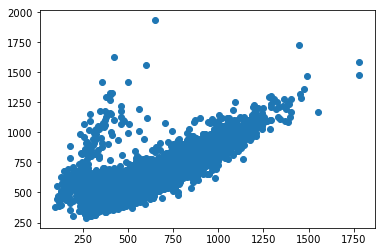

In [104]:
plt.scatter(y, regression.predict(X))

In [105]:
X.shape

(6077, 1)

In [110]:
X = df[xlabel].values

(1, 6077)

In [90]:
from sklearn import datasets
iris = datasets.load_iris()

In [95]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

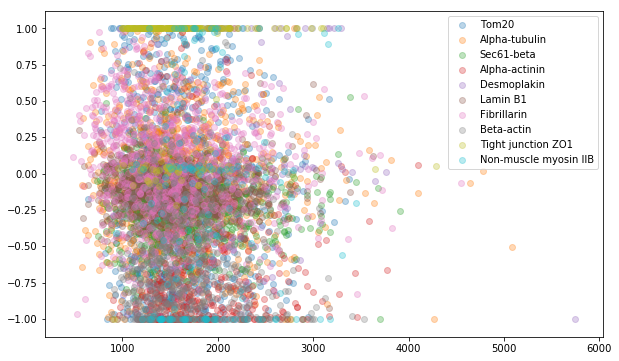

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
for structure in df.classes.unique():
    dfc = df[df.classes==structure]
    ax.scatter(dfc['Cellular volume (fL)'], dfc['Apical proximity (unitless)'], label=structure, 
              alpha=0.3)
ax.legend()
plt.show()

In [24]:
df.classes.unique()

array(['Tom20', 'Alpha-tubulin', 'Sec61-beta', 'Alpha-actinin',
       'Desmoplakin', 'Lamin B1', 'Fibrillarin', 'Beta-actin',
       'Tight junction ZO1', 'Non-muscle myosin IIB'], dtype=object)

In [28]:
ca = pd.Categorical(df.classes)

In [37]:
ca.categories

Index(['Alpha-actinin', 'Alpha-tubulin', 'Beta-actin', 'Desmoplakin',
       'Fibrillarin', 'Lamin B1', 'Non-muscle myosin IIB', 'Sec61-beta',
       'Tight junction ZO1', 'Tom20'],
      dtype='object')

And even graphs generated by such code:

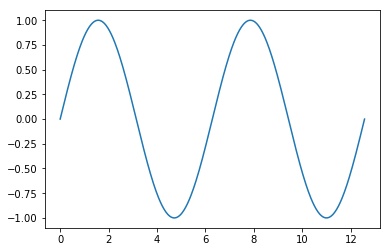

In [2]:
x = np.linspace(0,4*np.pi,500)
plt.plot(x, np.sin(x));